In [1]:
from Helper_modules import denoiser, helper_func, import_img, noise, evaluator
import os
import numpy as np

In [2]:
base_dir = os.getcwd()  # Current working directory

# Set the Import image and convert it to numpy array and normalize it

In [3]:
image_path = f"{base_dir}/Dataset/train/002_img.png"
image = import_img.load_and_normalize_image(image_path)

# Initialize differnt type of Noises and plot them

In [9]:
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image, salt_prob=0.008, pepper_prob=0.008)
gaussian_noisy_image = noise.add_gaussian_noise(salt_und_pepper_noisy_image, sigma=0.15)
poisson_noisy_image = noise.add_poisson_noise(image, lam = 100)
speckle_noisy_image = noise.add_speckle_noise(image)

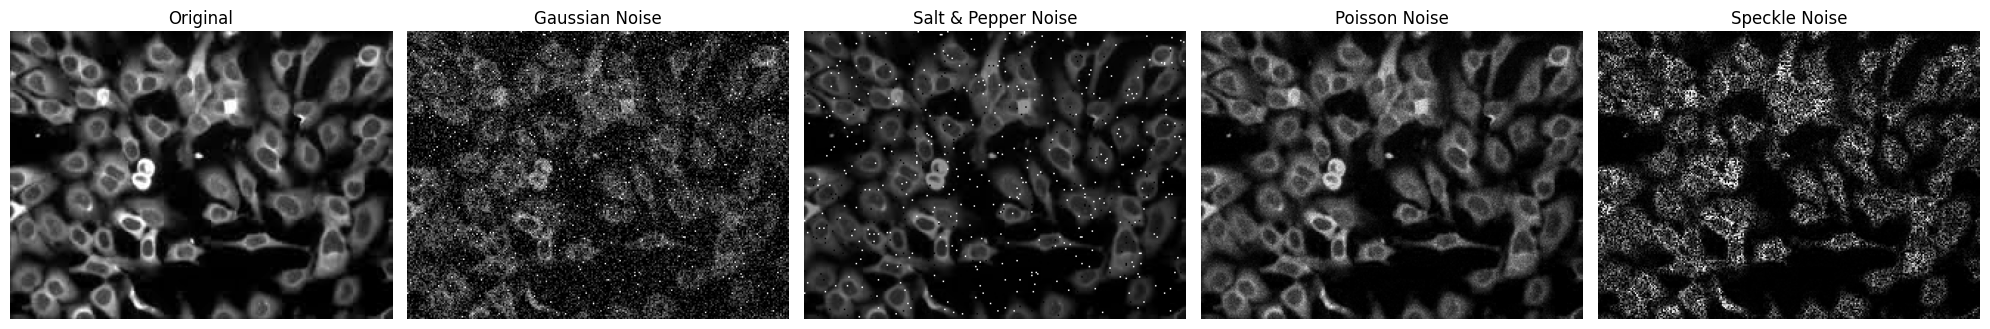

In [10]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

# Set the noise type nad select the noise

In [38]:
noisy_image = gaussian_noisy_image
noise_type = "Gaussian_Noise"

# Evaluator of all denoiser to find the best hyperparameters

In [39]:
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)
evaluator = evaluator.DenoisingEvaluator(image, noisy_image)

# Gaussian

In [40]:
# Example usage for Gaussian Denoising
gaussian_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigmaX': list(np.linspace(0.1,20,50))
}
gaussian_denoise_func = lambda d, sigmaX: denoiser.denoise_with_gaussian_blur(kernel_size=(d, d), sigmaX=sigmaX)
# Run Gaussian denoising evaluation
best_gaussian_psnr, best_gaussian_params = evaluator.evaluate_denoising(gaussian_denoise_func, gaussian_param_grid, 'numbers/gaussian_psnr_results.csv', 'Gaussian')
denoised_gaussian = gaussian_denoise_func(**best_gaussian_params)

done


# Bilateral

In [41]:
# Example usage for Bilateral Filter Denoising
bilateral_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigma_color': [25, 50, 75, 100, 125],
    'sigma_space': [25, 50, 75, 100, 125]
}
bilateral_denoise_func = lambda d, sigma_color, sigma_space: denoiser.denoise_with_bilateral_filter(
    d=d, sigma_color=sigma_color, sigma_space=sigma_space
)
# Run Bilateral filter evaluation
best_bilateral_psnr, best_bilateral_params = evaluator.evaluate_denoising(bilateral_denoise_func, bilateral_param_grid, 'numbers/bilateral_psnr_results.csv', 'Bilateral')


done


# NLM

In [42]:
# Example usage for Non-Local Means Denoising
nlm_param_grid = {
    'h': list(range(1, 100)),
}
nlm_denoise_func = lambda h: denoiser.denoise_with_nonlocal_means(h=h)
# Run Non-Local Means filter evaluation
best_nlm_psnr, best_nlm_params = evaluator.evaluate_denoising(
    nlm_denoise_func, nlm_param_grid, 'numbers/nlm_psnr_results.csv', 'Nonlocal Means')


done


# Median Filter

In [43]:
median_param_grid = {
    'size': [3, 5, 7, 9, 11]
}
median_denoise_func = lambda size: denoiser.denoise_with_median_filter(size=size)
# Run Median Filter denoising evaluation
best_median_psnr, best_median_params = evaluator.evaluate_denoising(median_denoise_func, median_param_grid, 'numbers/median_psnr_results.csv', 'Median')
denoised_median = median_denoise_func(**best_median_params)

done


<div class="alert alert-block alert-warning">
**Note:** Iterative
</div>

# Bergman TV

In [44]:
# Example usage for TV Bregman Denoising
tv_bregman_param_grid = {
    'weight': [0.1, 0.15, 0.2, 0.25],
    'max_iter': [100, 150, 200, 250]
}
tv_bregman_denoise_func = lambda weight, max_iter: denoiser.denoise_with_tv_bregman(weight=weight, max_iter=max_iter)
# Run TV Bregman denoising evaluation
best_tv_bregman_psnr, best_tv_bregman_params = evaluator.evaluate_denoising(tv_bregman_denoise_func, tv_bregman_param_grid, 'numbers/tv_bregman_psnr_results.csv', 'TV_Bregman')
denoised_tv_bregman = tv_bregman_denoise_func(**best_tv_bregman_params)

done


# TV Chambolle

In [45]:
# Example usage for TV Chambolle Denoising
tv_chambolle_param_grid = {
    'weight': [0.05, 0.1, 0.15, 0.2],
    'eps': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 150, 200, 250]
}
tv_chambolle_denoise_func = lambda weight, eps, max_iter: denoiser.denoise_with_tv_chambolle(img= denoised_median,weight=weight, epsilon=eps, max_num_iter=max_iter)
# Run TV Chambolle denoising evaluation
best_tv_chambolle_psnr, best_tv_chambolle_params = evaluator.evaluate_denoising(tv_chambolle_denoise_func, tv_chambolle_param_grid, 'numbers/tv_chambolle_psnr_results.csv', 'TV_Chambolle')
denoised_tv_chambolle = tv_chambolle_denoise_func(**best_tv_chambolle_params)

done


# Plot all the results (Denoised Images and correspondent PSNRs)

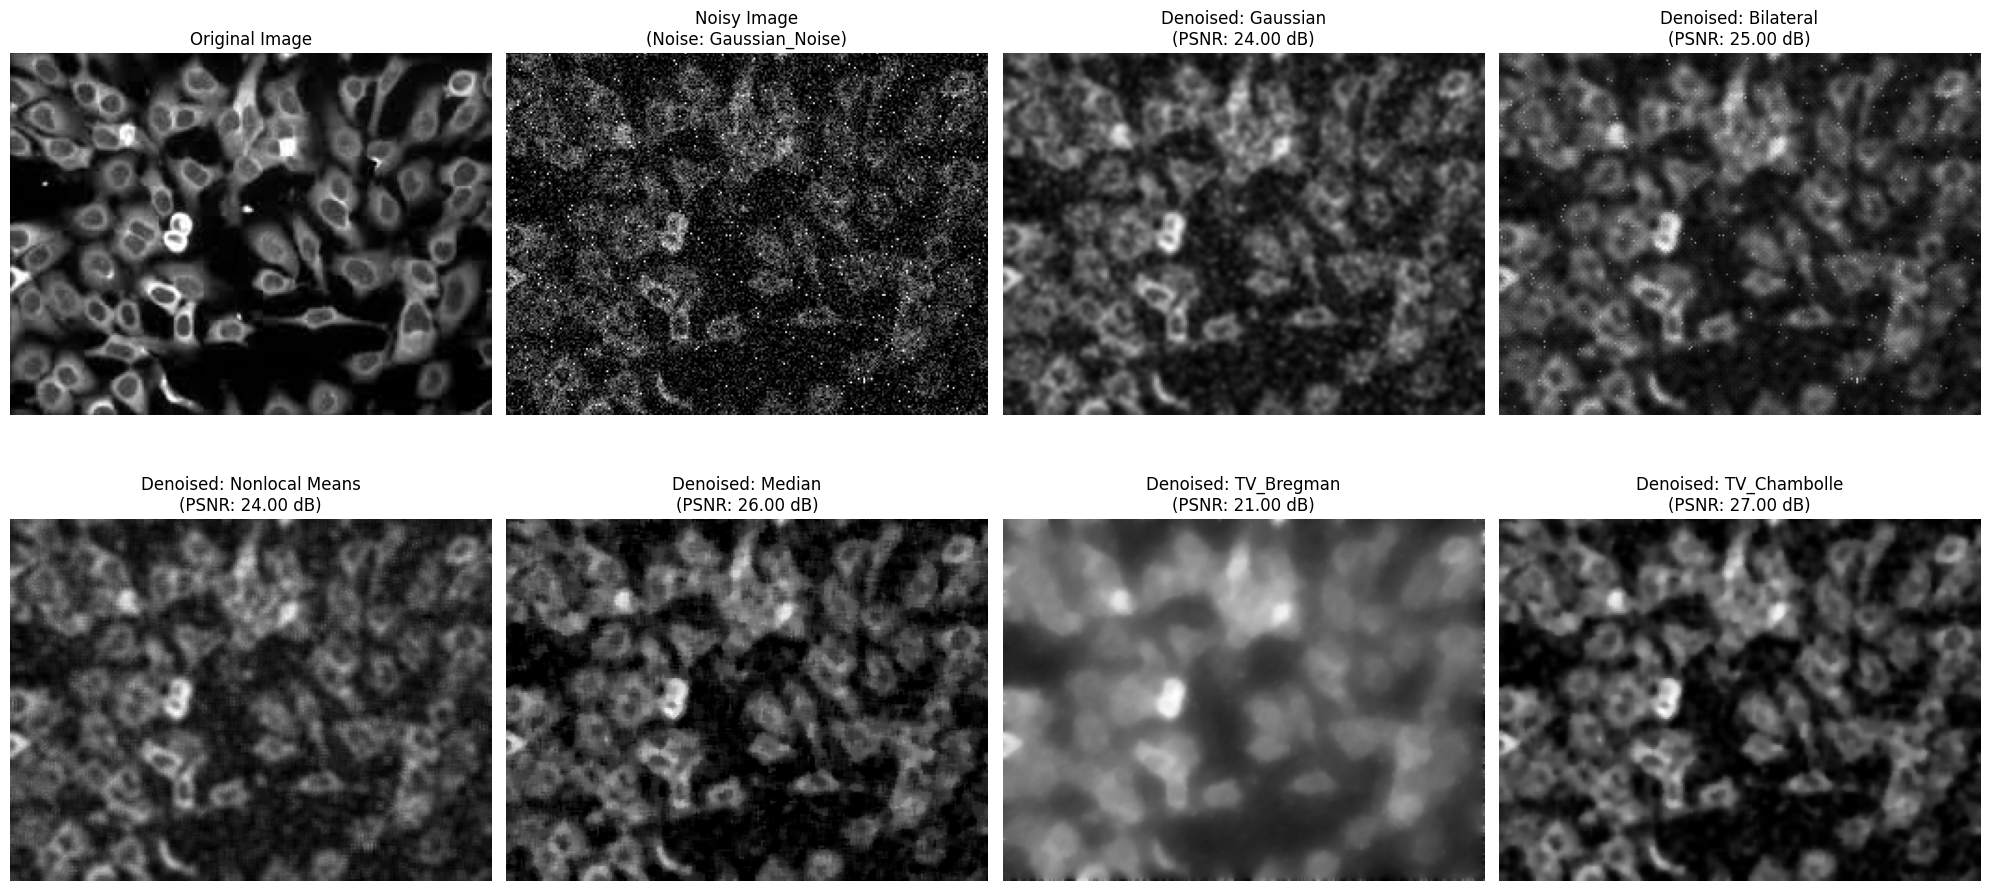

In [46]:
helper_func.plot_all_denoised(original=image, noisy=noisy_image, all_denoised=evaluator.all_denoised, 
                              method_names=evaluator.method_names, psnrs=evaluator.all_psnrs, noise_type=noise_type)

<div class="alert alert-block alert-warning">
**Note:** From Here is not Important
</div>


In [47]:
import matplotlib.pyplot as plt
# Define patch size (e.g., 32x32 pixels)
patch_size = 32
rows, cols = img.shape[0] // patch_size, img.shape[1] // patch_size

# Plot the original grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")

# Draw yellow lines to create a grid on the original image
for i in range(1, rows):
    plt.axhline(i * patch_size, color="yellow", linestyle="-", linewidth=2)
for j in range(1, cols):
    plt.axvline(j * patch_size, color="yellow", linestyle="-", linewidth=2)

plt.axis("off")  # Hide axes
plt.show()

NameError: name 'img' is not defined

In [ ]:
import math    
def calculate_snr(img):
    """Calculate the SNR (Signal-to-Noise Ratio) in decibels."""
    image_sd = np.std(img)
    image_mean = np.mean(img)
    if image_sd == 0:  # Avoid division by zero
        return float('inf')
    image_snr = image_mean / image_sd
    image_snr_db = 20 * math.log(image_snr, 10)
    return image_snr_db

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

gamma = 2.0

# Define paths
file_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/leech/2024_04_25_11_54_01_img_x_15_y_16_r_0_g_1_b_0_cropped.exr"
output_base_folder = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Results/Leech results"
results_file = os.path.join(output_base_folder, "results.txt")

# Define sigma_psd and stage_arg values
sigma_psd_values = np.linspace(0.005, 0.1, 20)
stage_args = [BM3DStages.HARD_THRESHOLDING, BM3DStages.ALL_STAGES]

# Ensure output base folder exists
os.makedirs(output_base_folder, exist_ok=True)

# Load noisy image
noisy_img, _ = process_exr(file_path)
plot_file = os.path.join(output_base_folder, f"bm3d_Original.png")
cv2.imwrite(plot_file, adjust_gamma((noisy_img * 255).astype("uint8"), gamma=gamma))

# GIF frames storage
gif_frames = {BM3DStages.HARD_THRESHOLDING: [], BM3DStages.ALL_STAGES: []}
snr_results = {BM3DStages.HARD_THRESHOLDING: [], BM3DStages.ALL_STAGES: []}

# Open the results file for writing
with open(results_file, "w") as results:
    for stage_arg in stage_args:
        # Create a folder for the stage_arg
        stage_arg_name = "HARD_THRESHOLDING" if stage_arg == BM3DStages.HARD_THRESHOLDING else "ALL_STAGES"
        stage_folder = os.path.join(output_base_folder, stage_arg_name)
        os.makedirs(stage_folder, exist_ok=True)

        # Iterate over sigma_psd values
        for sigma_psd in sigma_psd_values:
            # Apply BM3D denoising
            noisy_img[noisy_img > 0.5] = 1
            denoised_img = bm3d(noisy_img, sigma_psd=sigma_psd, profile="np", stage_arg=stage_arg)

            # Calculate SNR for the denoised image
            snr_denoised = calculate_snr((denoised_img * 255).astype("uint8"))
            snr_results[stage_arg].append((sigma_psd, snr_denoised))

            # Create a folder for this sigma_psd value
            sigma_folder = os.path.join(stage_folder, f"sigma_{sigma_psd:.3f}")
            os.makedirs(sigma_folder, exist_ok=True)

            # Save the gamma-adjusted image
            adjusted_image = adjust_gamma((denoised_img * 255).astype("uint8"), gamma=gamma)
            plot_file = os.path.join(sigma_folder, f"bm3d_sigma_{sigma_psd:.3f}.png")
            cv2.imwrite(plot_file, adjusted_image)

            # Overlay text
            pil_img = Image.fromarray(adjusted_image)
            draw = ImageDraw.Draw(pil_img)
            text = f"Sigma: {sigma_psd:.3f}\nSNR: {snr_denoised:.2f} dB"
            draw.text((10, 10), text, fill="white")
            gif_frames[stage_arg].append(pil_img)

            # Record results
            results.write(f"Stage Arg: {stage_arg_name}\n")
            results.write(f"Sigma PSD: {sigma_psd:.3f}\n")
            results.write(f"SNR: {snr_denoised:.2f} dB\n")
            print(f"Processed Sigma PSD: {sigma_psd:.3f}, Stage Arg: {stage_arg_name}, SNR: {snr_denoised:.2f} dB")

# Save GIFs
for stage_arg, frames in gif_frames.items():
    stage_name = "HARD_THRESHOLDING" if stage_arg == BM3DStages.HARD_THRESHOLDING else "ALL_STAGES"
    gif_path = os.path.join(output_base_folder, f"{stage_name}.gif")
    frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=1500, loop=0)

# Plot SNR vs. Sigma
plt.figure(figsize=(10, 6))
for stage_arg, data in snr_results.items():
    stage_name = "HARD_THRESHOLDING" if stage_arg == BM3DStages.HARD_THRESHOLDING else "ALL_STAGES"
    sigmas, snrs = zip(*data)
    plt.plot(sigmas, snrs, label=f"Stage: {stage_name}")

plt.title("SNR vs. Sigma for BM3D Denoising")
plt.xlabel("Sigma PSD")
plt.ylabel("SNR (dB)")
plt.legend()
plt.grid()
plt.tight_layout()

# Save the plot
snr_plot_path = os.path.join(output_base_folder, "snr_vs_sigma.png")
plt.savefig(snr_plot_path)
plt.show()
print(f"SNR plot saved at: {snr_plot_path}")
